In [66]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import cv2

In [67]:
train_folder = "chest_xray/chest_xray/train/"
val_folder = "chest_xray/chest_xray/val/"
test_folder = "chest_xray/chest_xray/test/"

In [68]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_10 (Activation)   (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)       

In [70]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.1,
                                    zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [71]:
train_data = train_datagen.flow_from_directory(train_folder, target_size=(224, 224), batch_size=32, class_mode='binary')


Found 5216 images belonging to 2 classes.


In [75]:
valid_data = test_datagen.flow_from_directory(val_folder, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 16 images belonging to 2 classes.


In [76]:
test_data = test_datagen.flow_from_directory(test_folder, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 624 images belonging to 2 classes.


In [77]:

test_labels = []
for cond in ['/NORMAL/', '/PNEUMONIA/']:
    for img in (os.listdir(test_folder + cond)):
        if cond=='/NORMAL/':
            label = 0
        elif cond=='/PNEUMONIA/':
            label = 1
        test_labels.append(label)
test_labels = np.array(test_labels)

In [78]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)

In [79]:
history = model.fit_generator(train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=valid_data,
                                verbose=1,
                                validation_steps=valid_data.samples//valid_data.batch_size,
                                epochs=10,
                                callbacks=[learning_rate_reduction])

Epoch 1/10
163/163 [==============================] - 95s 580ms/step - loss: 1.0141 - accuracy: 0.7868 - val_loss: 0.4491 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 89s 545ms/step - loss: 0.2332 - accuracy: 0.9181 - val_loss: 0.4775 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 96s 587ms/step - loss: 0.1937 - accuracy: 0.9287 - val_loss: 0.5639 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 92s 563ms/step - loss: 0.1695 - accuracy: 0.9410 - val_loss: 0.3690 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 91s 558ms/step - loss: 0.1639 - accuracy: 0.9444 - val_loss: 0.5395 - val_accuracy: 0.6875

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 6/10
163/163 [==============================] - 89s 544ms/step - loss: 0.1314 - accuracy: 0.9572 - val_loss: 0.4370 - val_accuracy: 0.6875
Epoch 7/10
163/163 [============================

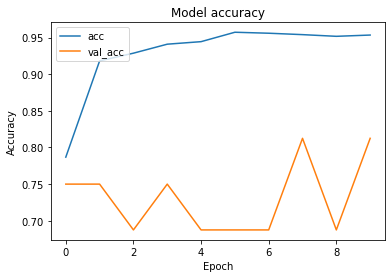

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

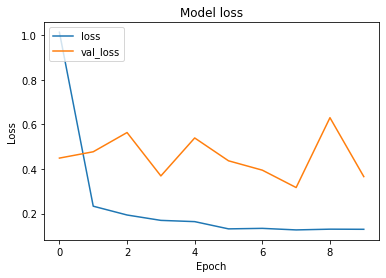

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [81]:
test_accuracy = model.evaluate_generator(test_data,steps=128)
print('The testing accuracy is :',test_eval[1]*100, '%')

The testing accuracy is : 81.74341917037964 %


In [83]:
pred = model.predict(test_data)

In [97]:
tn, fp, fn, tp = cm.ravel()
recall = tp/(tp+fn)*100
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))


Recall: 82.56410256410255%
F1-score: 71.31782945736433


In [98]:
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

Train acc: 95.34


[[ 43 191]
 [ 68 322]]


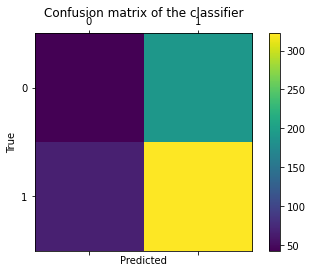

In [99]:
    from sklearn.metrics import confusion_matrix

    labels = [0, 1] 
    cm = confusion_matrix(test_labels, np.round(pred), labels) 
    print(cm) 
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(cm) 
    plt.title('Confusion matrix of the classifier') 
    fig.colorbar(cax) 
    ax.set_xticklabels([''] + labels) 
    ax.set_yticklabels([''] + labels) 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()